# Data Science Project – Segmentazione della clientela usando Machine Learning in R

in questo progetto verrà utilizzato una delle maggiori applicazioni di machine learning: la segmentazione dei clienti, che consiste nell' identificare, suddividere e raggruppare i propri utenti in specifici gruppi basati su caratteristiche comuni. Questa pratica consente una comunicazione più mirata, fatta di contenuti dinamici, personalizzati, pertinenti e tempestivi, che permettono di creare un rapporto one-to-one tra azienda e customer.

La segmentazione dei clienti è una delle più importanti applicazioni del unsupervised machine learning. Usando tecniche di clustering, le imprese possono identificare i diversi segmenti di clienti. In questo progetto verrà utilizzato l’algoritmo chiamato K-means clustering, il quale è il principale algoritmo per il clustering di dataset non etichettato (unsupervised).

Con il termine Clustering (in italiano « raggruppamento ») si denota un famiglia di metodi non supervisionati in grado di individuare raggruppamenti intrinseci cluster di pattern nello spazio multidimensionale e (di definire in corrispondenza di tali raggruppamenti le classi (incognite Il clustering ha applicazioni in numerose discipline pattern recognition machine learning computer vision data mining data base, e pertanto ha sempre ricevuto un notevole interesse



<img src="cluster1.jpg"> 

Criteri e algoritmi di clustering sono due cose ben distinte i primi descrivono cosa si vuol ottenere specificando il grado di ottimalità di ogni soluzione ammissibile i secondi, dato un
criterio di clustering forniscono una procedura algoritmica per determinare soluzioni che lo ottimizzano La segmentazione dei clienti é il processo di divisione della base di clienti in diversi gruppi di individui che condividono delle similitudini che sono rilevanti per il marketing, ossia il sesso, età, interessi, e abitudini di spesa molteplici.

Tra i diversi criteri possibili minimizzazione distanze dai centroidi minimizza la somma dei quadrati delle distanze dei pattern 𝐱dai centroidi (i e baricentri) delle classi 


<img src="cluster2.jpg"> 

dove 𝐶𝑖è l’i esimo cluster, 𝑛𝑖il numero di pattern che contiene e ത 𝐱𝑖il suo centroide (È
un buon criterio per cluster a simmetria radiale (i e circolari), ma penalizza forme allungate o cluster innestati (i e un cluster a forma di anello con all’interno un altro cluster)

Clustering basato su centroidi attraverso processi euristici ( si individuano i cluster cercando di minimizzare la distanza dei pattern dai centroidi dei cluster cui appartengono:
K means
Fuzzy
K means
Expectation - Maximization Gaussian Mixture
K- means
K-means (o C means è un metodo computazionalmente molto semplice e altrettanto semplice da implementare per questo motivo è spesso la prima scelta per risolvere problemi di clustering 
Minimizza «implicitamente» le distanze dai centroidi
Richiede in input il numero di cluster 𝑠 e una soluzione iniziale 
Produce buoni risultati a patto di fornire una ragionevole soluzione iniziale e un numero adeguato di classi 
Il tipo di ottimizzazione è iterativa e locale pertanto il metodo può convergere a massimi locali della soluzione La convergenza si ottiene solitamente in pochi passi 10
Identifica cluster iper sferici nel caso in cui venga utilizzata la distanza euclidea come misura di distanza tra i pattern o cluster iper ellissoidali nel caso di distanza di Mahalanobis 
Nella sua versione base l’algoritmo può essere così descritto
I cluster sono modificati iterativamente a seguito del ricalcolo del loro centroide L’algoritmo termina ( quando i centroidi sono stabili e quindi le partizioni non cambiano.


Come primo passo verrà analizzato il dataset. Viene caricato il file con i dati richiesti per questo progetto e vengono letti i dati:


In [1]:
customer_data=read.csv("Mall_Customers.csv")
str(customer_data)
names(customer_data)
head(customer_data)
summary(customer_data$Age)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [2]:
sd(customer_data$Age)
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)
summary(customer_data$Age)
sd(customer_data$Spending.Score..1.100.)

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 25.82352

Customer Gender Visualization
Creiamo un grafico a barre e uno a torta che mostra la distribuzione del sesso dei clienti con il seguente codice:


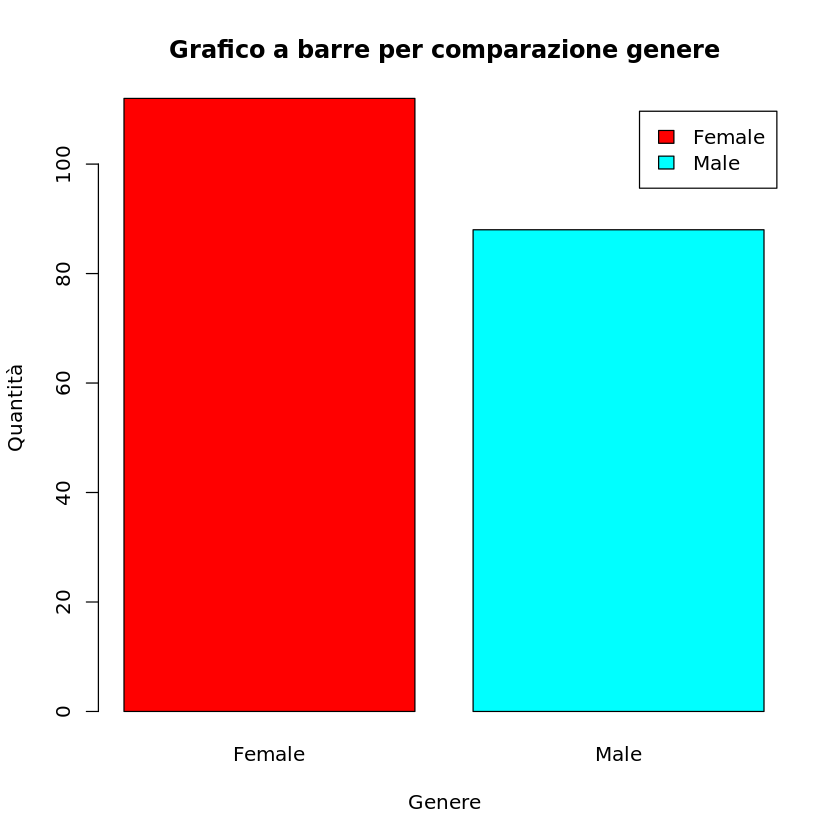

In [3]:
a=table(customer_data$Gender)
barplot(a,main="Grafico a barre per comparazione genere",
        ylab="Quantità",
        xlab="Genere",
        col=rainbow(2),
        legend=rownames(a))

Dal grafico si evince che il numero di femmine é piu alto rispetto al numero dei maschi.
Ora visualizziamo il grafico a torta per osservare il ratio di distribuzione tra maschi e femmine.


In [4]:
pct=round(a/sum(a)*100)
lbs=paste(c("Donne","Uomini")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
      main="Grafico a torta ratio uomini e donne")


ERROR: Error in library(plotrix): there is no package called ‘plotrix’


In [ ]:







hist(customer_data$Age,
     col="blue",
     main="Istogramma per classi di età",
     xlab="Classe età",
     ylab="Frequenza",
     labels=TRUE)

boxplot(customer_data$Age,
        col="red",
        main="Boxplot per descrizione analisi dell'età")

summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
     col="#660033",
     main="Istogramma del reddito annuale",
     xlab="Classe di reddito annuale",
     ylab="Frequenza",
     labels=TRUE)

plot(density(customer_data$Annual.Income..k..),
     col="yellow",
     main="Grafico di intensità per reddito anuale",
     xlab="Classe di reddito annuale",
     ylab="Densità")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

summary(customer_data$Spending.Score..1.100.)


boxplot(customer_data$Spending.Score..1.100.,
        horizontal=TRUE,
        col="#990000",
        main="BoxPlot per l'analisi descrittiva del punteggio di spesa")

hist(customer_data$Spending.Score..1.100.,
     main="Istogramma per il punteggio di spesa",
     xlab="Classe di punteggio di spesa",
     ylab="Frequenza",
     col="#6600cc",
     labels=TRUE)

library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)
plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total intra-clusters sum of squares")

library(cluster) 
library(gridExtra)
library(grid)


k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

library(NbClust)
library(factoextra)

fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(stat_gap)
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")


ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")


kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))

